In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model Comparison

In [62]:
def compare_distribution(data, metric, labels):

    flierprops = dict(marker='o', markerfacecolor='grey', markersize=4, markeredgewidth=0)

    # Boxplot
    sns.boxplot(data=data, x="model", y=metric, hue="model", flierprops=flierprops, showfliers=True, palette="Set2")

    y_lower, y_upper = labels['bounds']

    plt.title(labels['title'])
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.ylabel(labels['ylabel'])
    plt.ylim(y_lower, y_upper)
    plt.show()
        

def compare_vina_min(data):

    # vina score system-level comparison
    sys_avg_data = data.groupby(['model', 'sys_id'])["minimizedAffinity"].mean().reset_index()

    # Sort by ascending vina score
    sys_order = sys_avg_data[sys_avg_data["model"] == "true"].sort_values("minimizedAffinity", ascending=False)["sys_id"].tolist()
    sys_avg_data["sys_id"] = pd.Categorical(sys_avg_data["sys_id"], categories=sys_order, ordered=True)
    
    plt.figure(figsize=(12, 10))

    sns.lineplot(
        x="sys_id", 
        y="minimizedAffinity", 
        hue="model", 
        data=sys_avg_data, 
        palette='Set2',
        legend=False
    )

    sns.scatterplot(
        x="sys_id", 
        y="minimizedAffinity", 
        hue="model", 
        data=sys_avg_data, 
        palette='Set2',
    )

    plt.gca().invert_yaxis()

    labels = plt.gca().get_xticklabels()
    for i, label in enumerate(labels):
        if i % 5 != 0:
            label.set_visible(False)

    ax = plt.gca()
    for pos in range(0, len(sys_order), 5):
        ax.axvline(x=pos, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
        
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Mean Vina score")
    plt.tight_layout()
    plt.show()


def pb_validity_summary(data):
    avg_pb_metrics = {}

    for col in data.columns:
        avg_pb_metrics[col] = data[col].mean()

    sorted_pb_metrics = sorted(avg_pb_metrics.items(), key=lambda item: item[1])

    # Print sorted key-value pairs
    for key, value in sorted_pb_metrics:
        print(f"{key}: {value}")

In [63]:
# rigid docking
rdock_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot/rigid_docking/rigid_docking_condensed_metrics.csv')
rdock_metrics['model'] = 'rigid_docking'

# rigid protein, ligand de novo
rprot_denovo_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot/rigid_protein_lig_denovo/fixed_protein_ligand_denovo_condensed_metrics.csv')
rprot_denovo_metrics['model'] = 'rigid_prot_lig_denovo'

# rigid docking + pharm
rdock_pharm_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm/rigid_docking_pharm/rigid_docking_pharmacophore_condensed_metrics.csv')
rdock_pharm_metrics['model'] = 'rigid_docking_pharm'

# rigid protein + pharm
rprot_pharm_denovo_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm/rigid_protein_pharm_lig_denovo/fixed_protein_pharmacophore_ligand_denovo_condensed_metrics.csv')
rprot_pharm_denovo_metrics['model'] = 'rigid_prot_pharm_lig_denovo'

In [69]:
rprot_pharm_denovo_metrics['interaction_recovery']

0     0.60
1     0.60
2     0.40
3     0.40
4     0.40
      ... 
95    0.75
96    0.25
97    0.25
98    0.00
99    0.25
Name: interaction_recovery, Length: 100, dtype: float64

In [70]:
true = rdock_metrics[[col for col in rdock_metrics.columns if '_true' in col and 'pb_mol_true_loaded' != col]].copy()
true.columns = [col[:-5] for col in true]
true[['sys_id', 'system_id', 'ligand_id', 'ccd']] = rdock_metrics[['sys_id', 'system_id', 'ligand_id', 'ccd']]
true['model'] = 'true'
true = true.drop_duplicates(subset=['sys_id'])
true

,pb_mol_pred_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,pb_bond_lengths,pb_bond_angles,pb_internal_steric_clash,pb_aromatic_ring_flatness,pb_non-aromatic_ring_non-flatness,...,minimizedAffinity,CNNscore,CNNaffinity,CNNaffinity_variance,vina_min,sys_id,system_id,ligand_id,ccd,model
0,True,True,True,True,True,True,True,True,True,True,...,-2.97562,0.733120,3.004144,0.530260,-4.04023,sys_0_gt,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,true
10,True,True,True,True,True,True,True,True,True,True,...,-6.69706,0.648250,5.209921,0.121026,-8.89318,sys_1_gt,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.K,ATP,true
20,True,True,True,True,True,True,True,True,True,True,...,-5.72963,0.919269,4.932184,0.164366,-6.69169,sys_2_gt,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.L,CIR,true
30,True,True,True,True,True,True,True,True,True,True,...,-9.43334,0.971450,5.720226,0.329828,-10.42666,sys_3_gt,5yft__1__2.C__2.N,2.N,RI2,true
40,True,True,True,True,True,True,True,True,True,True,...,-9.72386,0.984739,5.519558,0.934152,-10.46743,sys_4_gt,4rrd__1__1.A_2.A__1.B,1.B,A3T,true
50,True,True,True,True,True,True,True,True,True,True,...,-3.72965,0.894002,5.621296,0.106707,-4.80368,sys_5_gt,3t1n__2__1.B__1.D,1.D,SEP-ASP-GLU-PHE,true
60,True,True,True,True,True,True,True,True,True,True,...,-9.69120,0.955622,6.769621,0.006292,-10.30882,sys_6_gt,6jat__1__1.A_1.B__1.E,1.E,SFG,true
70,True,True,True,True,True,True,True,True,True,True,...,-6.17614,0.346985,5.296934,0.648953,-6.76915,sys_7_gt,6c3u__1__1.A_1.B__1.G_1.H,1.G,NY2,true
80,True,True,True,True,True,True,True,True,True,True,...,-8.78159,0.901281,5.233331,0.024513,-9.38502,sys_8_gt,4jxx__1__1.A__1.C,1.C,ATP,true
90,True,True,True,True,True,True,True,True,True,True,...,-7.94802,0.783877,4.678316,0.029008,-9.01415,sys_9_gt,4bls__1__1.B_1.C__1.F,1.F,APC,true


In [20]:
all_results = pd.concat([rdock_metrics, rprot_denovo_metrics, rdock_pharm_metrics, rprot_pharm_denovo_metrics, true], ignore_index=True)
all_results.drop(columns=[col for col in all_results.columns if '_true' in col and 'pb_mol_true_loaded' != col], inplace=True)
all_results

,sys_id,protein_id,gen_ligand_id,RDKit_valid,pb_mol_pred_loaded,pb_mol_true_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,...,minimizedAffinity,CNNscore,CNNaffinity,CNNaffinity_variance,vina_min,rmsd,system_id,ligand_id,ccd,model
0,sys_0_gt,protein_0,gen_ligands_0,True,True,True,True,True,True,True,...,-2.46214,0.467529,2.888808,0.545051,-4.70747,0.910036,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
1,sys_0_gt,protein_0,gen_ligands_1,True,True,True,True,True,True,True,...,-4.08529,0.650853,3.128019,0.295886,-4.73754,3.565462,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
2,sys_0_gt,protein_0,gen_ligands_2,True,True,True,True,True,True,True,...,-2.35500,0.588210,3.134465,0.247416,-4.82380,3.535178,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
3,sys_0_gt,protein_0,gen_ligands_3,True,True,True,True,True,True,True,...,-3.66318,0.792233,3.345226,0.284724,-4.53129,3.358418,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
4,sys_0_gt,protein_0,gen_ligands_4,True,True,True,True,True,True,True,...,-3.70422,0.626305,3.218030,0.413984,-4.55184,0.891399,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,sys_5_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-3.72965,0.894002,5.621296,0.106707,-4.80368,NaN,3t1n__2__1.B__1.D,1.D,SEP-ASP-GLU-PHE,true
406,sys_6_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-9.69120,0.955622,6.769621,0.006292,-10.30882,NaN,6jat__1__1.A_1.B__1.E,1.E,SFG,true
407,sys_7_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-6.17614,0.346985,5.296934,0.648953,-6.76915,NaN,6c3u__1__1.A_1.B__1.G_1.H,1.G,NY2,true
408,sys_8_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-8.78159,0.901281,5.233331,0.024513,-9.38502,NaN,4jxx__1__1.A__1.C,1.C,ATP,true


In [21]:
all_results = pd.concat([rdock_metrics, rprot_denovo_metrics, rdock_pharm_metrics, rprot_pharm_denovo_metrics, true], ignore_index=True)
all_results.drop(columns=[col for col in all_results.columns if '_true' in col and 'pb_mol_true_loaded' != col], inplace=True)
all_results

,sys_id,protein_id,gen_ligand_id,RDKit_valid,pb_mol_pred_loaded,pb_mol_true_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,...,minimizedAffinity,CNNscore,CNNaffinity,CNNaffinity_variance,vina_min,rmsd,system_id,ligand_id,ccd,model
0,sys_0_gt,protein_0,gen_ligands_0,True,True,True,True,True,True,True,...,-2.46214,0.467529,2.888808,0.545051,-4.70747,0.910036,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
1,sys_0_gt,protein_0,gen_ligands_1,True,True,True,True,True,True,True,...,-4.08529,0.650853,3.128019,0.295886,-4.73754,3.565462,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
2,sys_0_gt,protein_0,gen_ligands_2,True,True,True,True,True,True,True,...,-2.35500,0.588210,3.134465,0.247416,-4.82380,3.535178,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
3,sys_0_gt,protein_0,gen_ligands_3,True,True,True,True,True,True,True,...,-3.66318,0.792233,3.345226,0.284724,-4.53129,3.358418,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
4,sys_0_gt,protein_0,gen_ligands_4,True,True,True,True,True,True,True,...,-3.70422,0.626305,3.218030,0.413984,-4.55184,0.891399,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,sys_5_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-3.72965,0.894002,5.621296,0.106707,-4.80368,NaN,3t1n__2__1.B__1.D,1.D,SEP-ASP-GLU-PHE,true
406,sys_6_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-9.69120,0.955622,6.769621,0.006292,-10.30882,NaN,6jat__1__1.A_1.B__1.E,1.E,SFG,true
407,sys_7_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-6.17614,0.346985,5.296934,0.648953,-6.76915,NaN,6c3u__1__1.A_1.B__1.G_1.H,1.G,NY2,true
408,sys_8_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,-8.78159,0.901281,5.233331,0.024513,-9.38502,NaN,4jxx__1__1.A__1.C,1.C,ATP,true


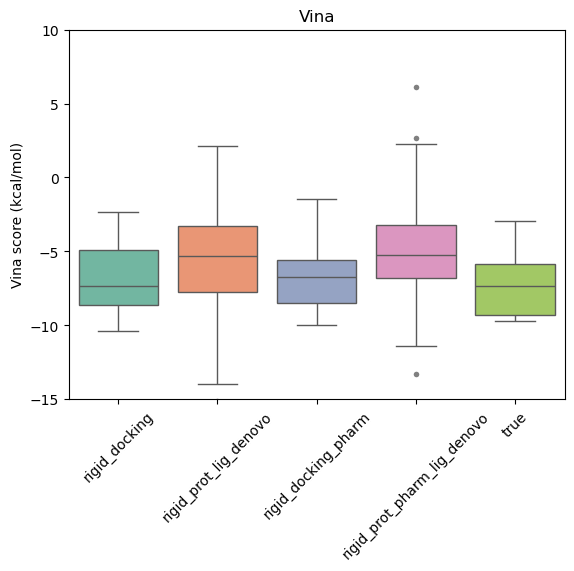

In [72]:
compare_distribution(data=all_results, metric='minimizedAffinity', labels={'title': 'Vina', 'ylabel': 'Vina score (kcal/mol)', 'bounds': (-15,10)})

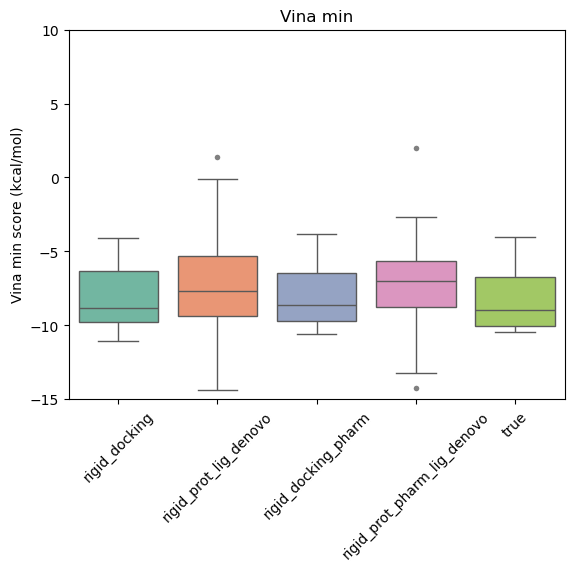

In [73]:
compare_distribution(data=all_results, metric='vina_min', labels={'title': 'Vina min', 'ylabel': 'Vina min score (kcal/mol)', 'bounds': (-15, 10)})

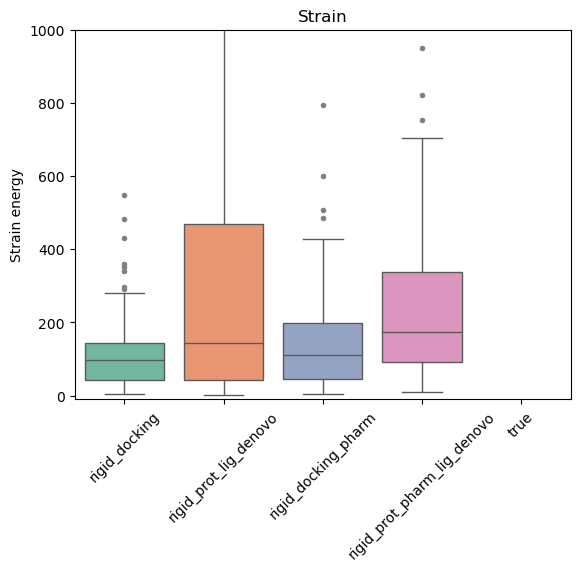

In [74]:
compare_distribution(data=all_results, metric='strain', labels={'title': 'Strain', 'ylabel': 'Strain energy', 'bounds': (-10, 1000)})

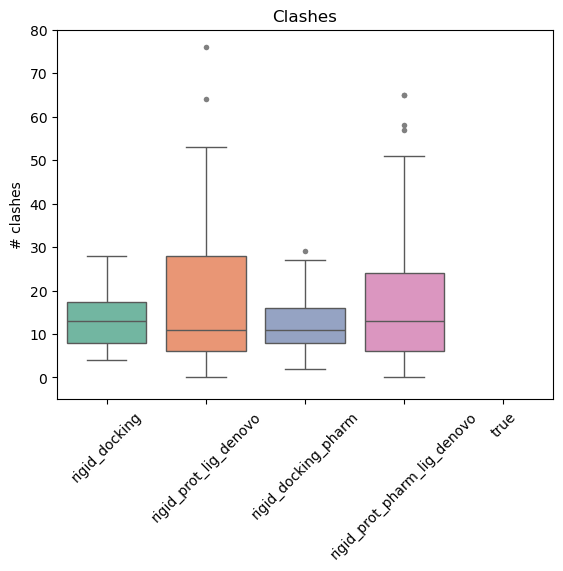

In [75]:
compare_distribution(data=all_results, metric='clashes', labels={'title': 'Clashes', 'ylabel': '# clashes', 'bounds': (-5, 80)})

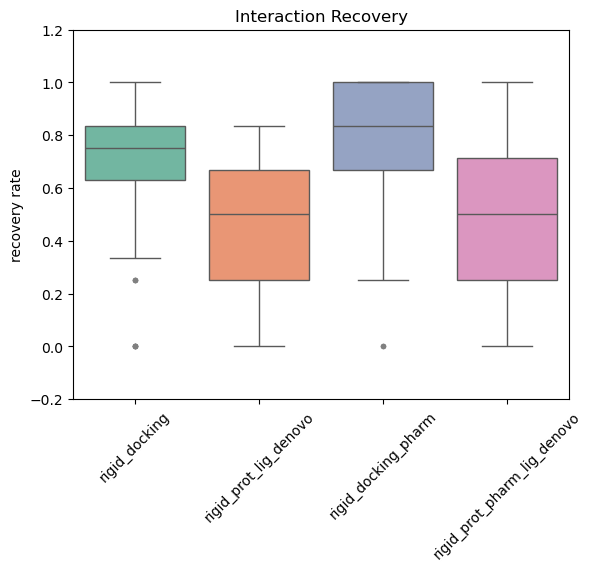

In [76]:
compare_distribution(data=all_results[all_results['model'] != 'true'], metric='interaction_recovery', labels={'title': 'Interaction Recovery', 'ylabel': 'recovery rate', 'bounds': (-0.2, 1.2)})

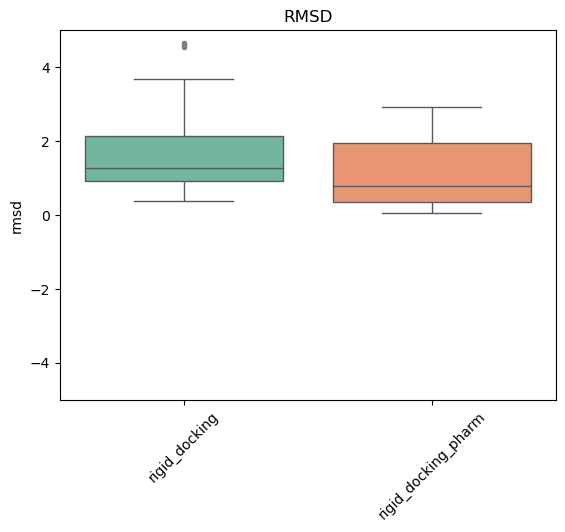

In [77]:
compare_distribution(data=all_results[all_results['model'].isin(['rigid_docking', 'rigid_docking_pharm'])], metric='rmsd', labels={'title': 'RMSD', 'ylabel': 'rmsd', 'bounds': (-5, 5)})

In [ ]:
compare_distribution(data=all_results[all_results['model'] != 'true'], metric='frac_true_pharms_matched', labels={'title': 'Fraction of True Pharmacophore Centers Matched', 'ylabel': 'fraction', 'bounds': (-0.2, 1.2)})

In [26]:
# PoseBusters checks
pb_checks = [col for col in all_results if 'pb_' in col]
pb = all_results.copy()
pb = pb[pb_checks].copy()
pb[['model','sys_id']] = all_results[['model', 'sys_id']]

pb_summary = pd.DataFrame(index=pb_checks, columns=all_results['model'].unique())

for check in pb_checks:
    pb[check] = pd.to_numeric(pb[check], errors='coerce')
    sys_avg = pb.groupby(['model', 'sys_id'])[check].mean()
    model_avg = sys_avg.groupby('model').mean()

    pb_summary.loc[check, :] = model_avg

pb_summary

,rigid_docking,rigid_prot_lig_denovo,rigid_docking_pharm,rigid_prot_pharm_lig_denovo,true
pb_mol_pred_loaded,1.0,1.0,1.0,1.0,1.0
pb_mol_true_loaded,1.0,NaN,1.0,NaN,NaN
pb_mol_cond_loaded,1.0,1.0,1.0,1.0,1.0
pb_sanitization,1.0,1.0,1.0,1.0,1.0
pb_inchi_convertible,1.0,1.0,1.0,1.0,1.0
pb_all_atoms_connected,1.0,0.975,1.0,0.96,1.0
pb_molecular_formula,1.0,NaN,1.0,NaN,NaN
pb_molecular_bonds,1.0,NaN,1.0,NaN,NaN
pb_double_bond_stereochemistry,1.0,NaN,1.0,NaN,NaN
pb_tetrahedral_chirality,0.43,NaN,0.5,NaN,NaN


In [27]:
# Table 2 from FLOWR
# 100 samples, 100 replicates

summary_table_1 = pd.DataFrame(index=all_results['model'].unique())
table_metrics = {'pb_valid': 'PB-valid',
                 'strain': 'Strain',
                 'minimizedAffinity': 'Vina score',
                 'vina_min': 'Vina min score',
                 'rmsd': 'RMSD'}

for metric, name in table_metrics.items():
    # ensure numeric; non-numeric -> NaN
    all_results[metric] = pd.to_numeric(all_results[metric], errors='coerce')
    
    sys_avg = all_results.groupby(['model', 'sys_id'])[metric].mean()
    mean = sys_avg.groupby('model').mean()
    std = sys_avg.groupby('model').std()
    
    # safely handle NaNs in formatting
    summary_table_1[name] = mean.round(3).astype(str).fillna('NaN') + " ± " + std.round(3).astype(str).fillna('NaN')

summary_table_1

,PB-valid,Strain,Vina score,Vina min score,RMSD
rigid_docking,0.26 ± 0.135,140.723 ± 117.409,-6.747 ± 2.242,-8.049 ± 2.14,1.892 ± 0.869
rigid_prot_lig_denovo,0.518 ± 0.244,425.545 ± 354.438,-5.178 ± 3.118,-7.468 ± 2.676,nan ± nan
rigid_docking_pharm,0.43 ± 0.386,154.391 ± 117.153,-6.575 ± 2.176,-7.855 ± 2.232,2.049 ± 2.625
rigid_prot_pharm_lig_denovo,0.496 ± 0.281,304.394 ± 203.224,-4.418 ± 2.803,-7.02 ± 2.391,nan ± nan
true,1.0 ± 0.0,nan ± nan,-7.089 ± 2.446,-8.08 ± 2.36,nan ± nan


In [28]:
# Table 2 from DrugFlow

from scipy.stats import wasserstein_distance

models = list(set(all_results['model'].unique()) - {'true'})
summary_table_2 = pd.DataFrame(index=models)
table_metrics = {'minimizedAffinity': 'Vina score',
                 'CNNscore': 'Gnina score',
                 'HBAcceptor': 'H-bond (acc.)',
                 'HBDonor': 'H-bond (don.)',
                 'Hydrophobic': 'Hydrophobic'}

for metric, name in table_metrics.items():
    true_dist = all_results.loc[all_results['model'] == 'true', metric].dropna().astype(np.float64).to_numpy()

    for model in models:
        data_dist = all_results.loc[all_results['model'] == model, metric].dropna().astype(np.float64).to_numpy()
        summary_table_2.loc[model, name] = wasserstein_distance(data_dist, true_dist) 

summary_table_2

ValueError: Distribution can't be empty.

# Single Model Analysis

In [46]:
metrics_path = '/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm/rigid_protein_pharm_lig_denovo/fixed_protein_pharmacophore_ligand_denovo_condensed_metrics.csv'
data = pd.read_csv(metrics_path)

In [51]:
import matplotlib.pyplot as plt

def plot_by_sys(data, metric, order="desc"):
   
    metric_true = f"{metric}_true"

    # Group by system
    grouped = data.groupby('sys_id')

    # Collect replicates + truths
    replicates = [g[metric].values for _, g in grouped]
    truths = [g[metric_true].iloc[0] for _, g in grouped]
    systems = list(grouped.groups.keys())

    # Sort systems by truth
    reverse = (order == "desc")
    ordered = sorted(zip(systems, replicates, truths), key=lambda x: x[2], reverse=reverse)
    systems, replicates, truths = zip(*ordered)

    # Plot
    fig, ax = plt.subplots(figsize=(12,6))
    bp = ax.boxplot(replicates, positions=range(len(systems)), patch_artist=True)
    ax.scatter(range(len(systems)), truths, color="red", marker="x", s=100, label="Ground truth", zorder=3)

    # Format axes
    ax.set_xticks(range(len(systems)))
    ax.set_xticklabels(systems, rotation=90, ha="right")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric}: replicates vs ground truth (sorted {order})")

    plt.tight_layout()
    return fig, ax

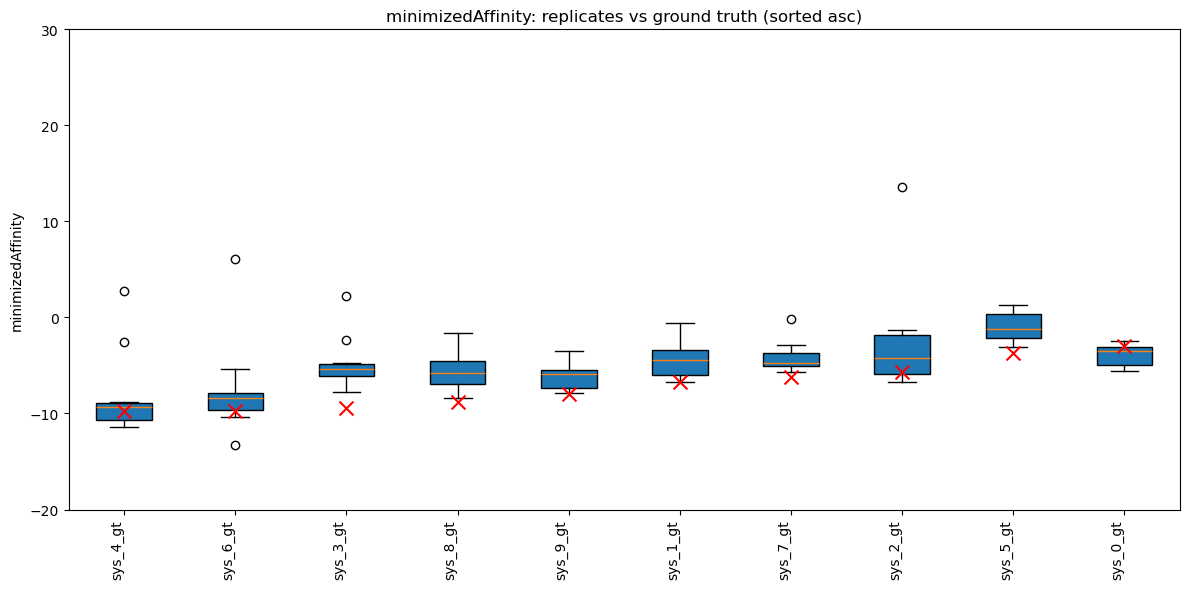

In [54]:
fig, ax = plot_by_sys(data, "minimizedAffinity", order="asc")

ax.set_ylim(-20, 30)
fig.show()

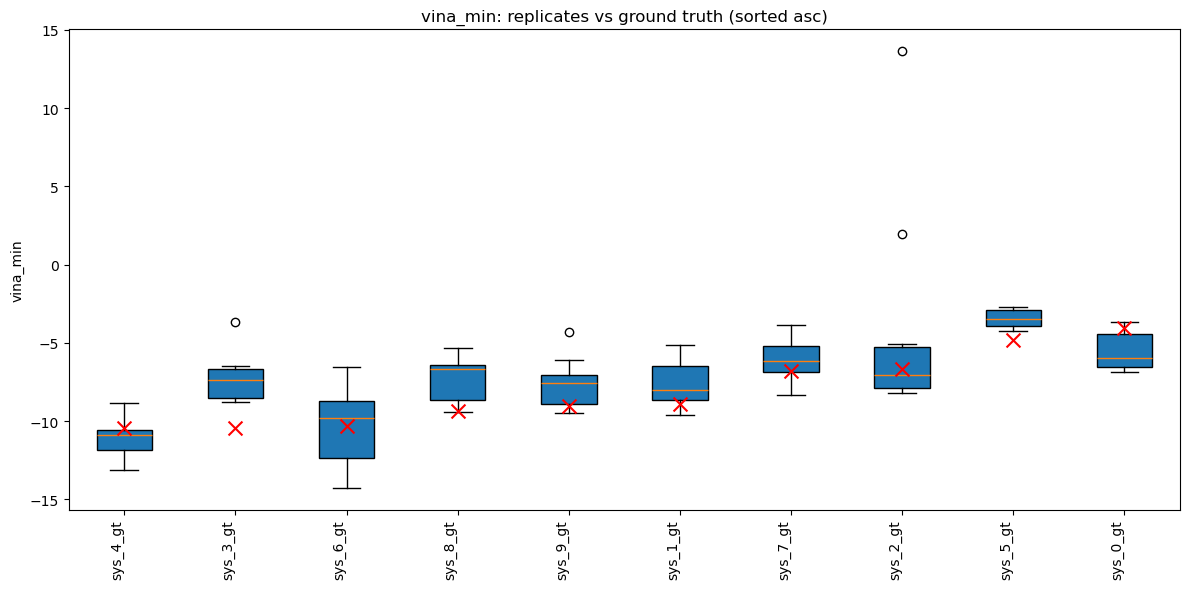

In [55]:
fig, ax = plot_by_sys(data, "vina_min", order="asc")

fig.show()

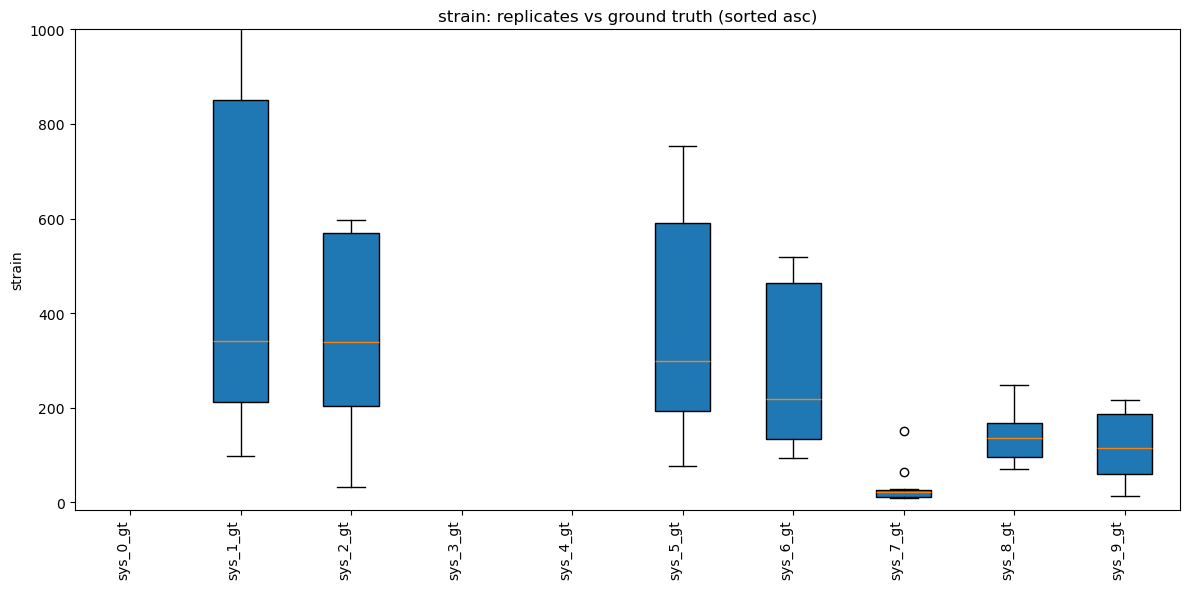

In [56]:
fig, ax = plot_by_sys(data, "strain", order="asc")

ax.set_ylim(-15, 1000)
fig.show()

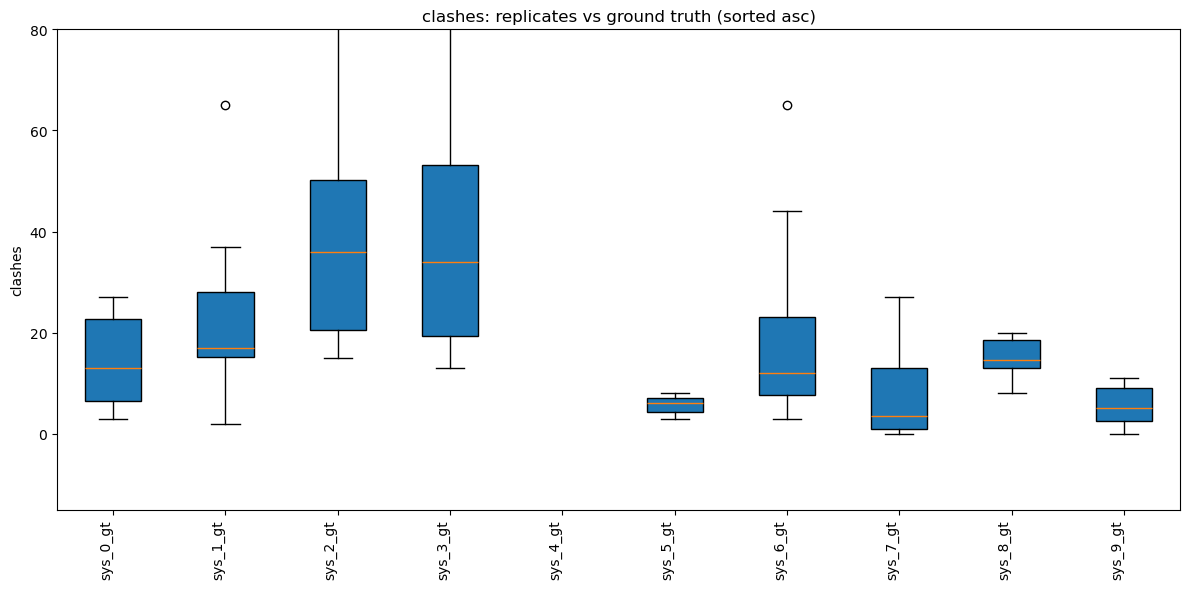

In [57]:
fig, ax = plot_by_sys(data, "clashes", order="asc")

ax.set_ylim(-15, 80)
fig.show()

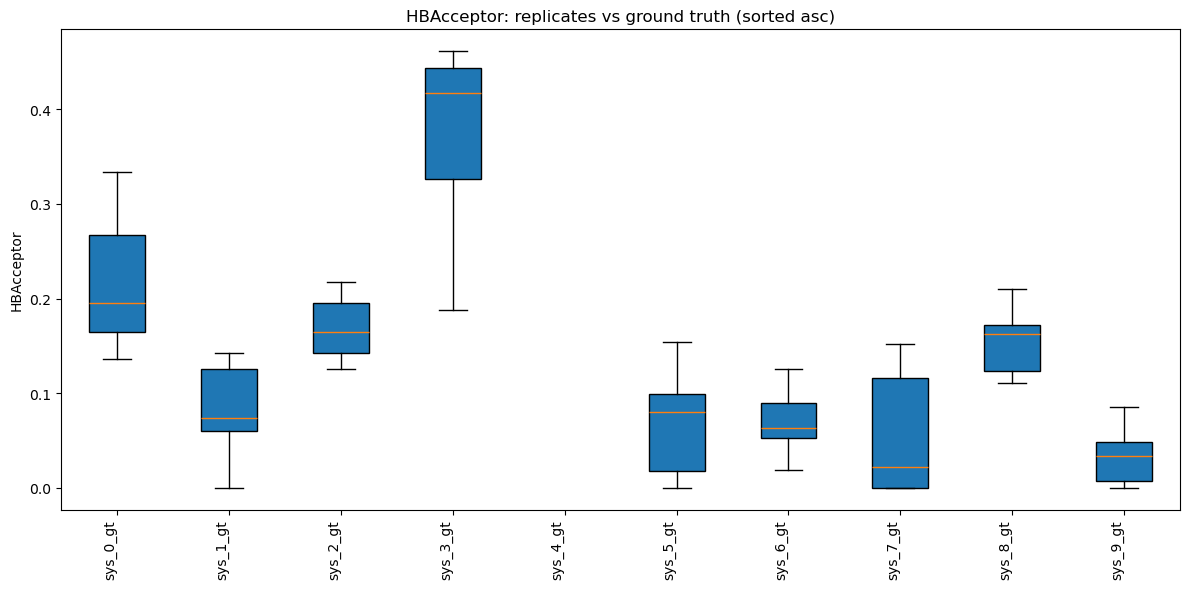

In [58]:
fig, ax = plot_by_sys(data, "HBAcceptor", order="asc")

#ax.set_ylim(-15, 80)
fig.show()

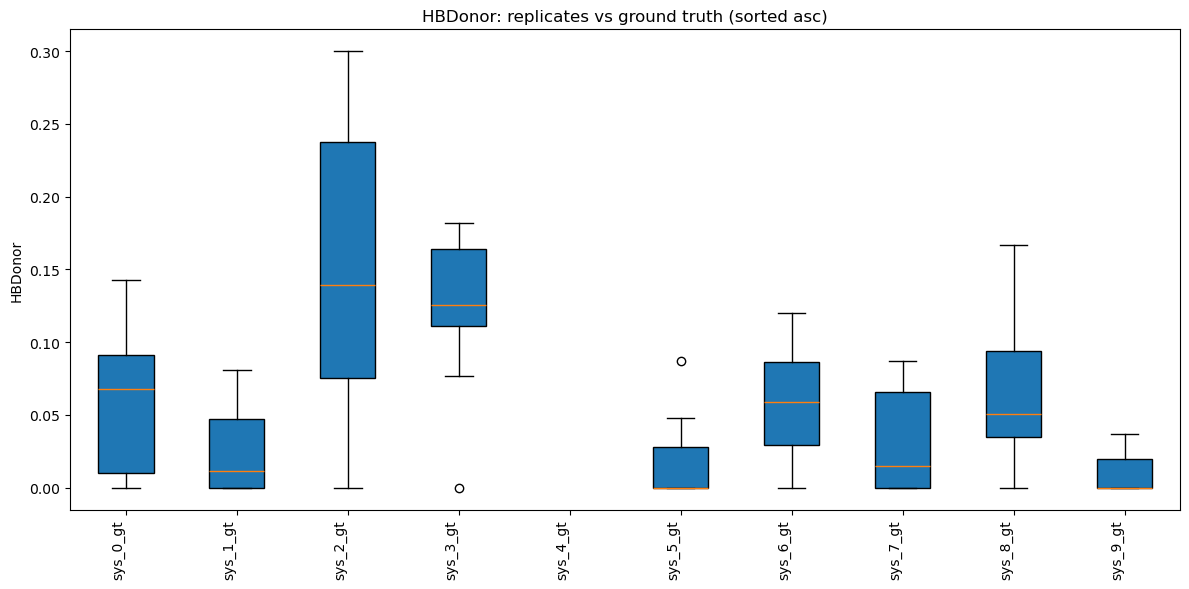

In [59]:
fig, ax = plot_by_sys(data, "HBDonor", order="asc")

#ax.set_ylim(-15, 80)
fig.show()

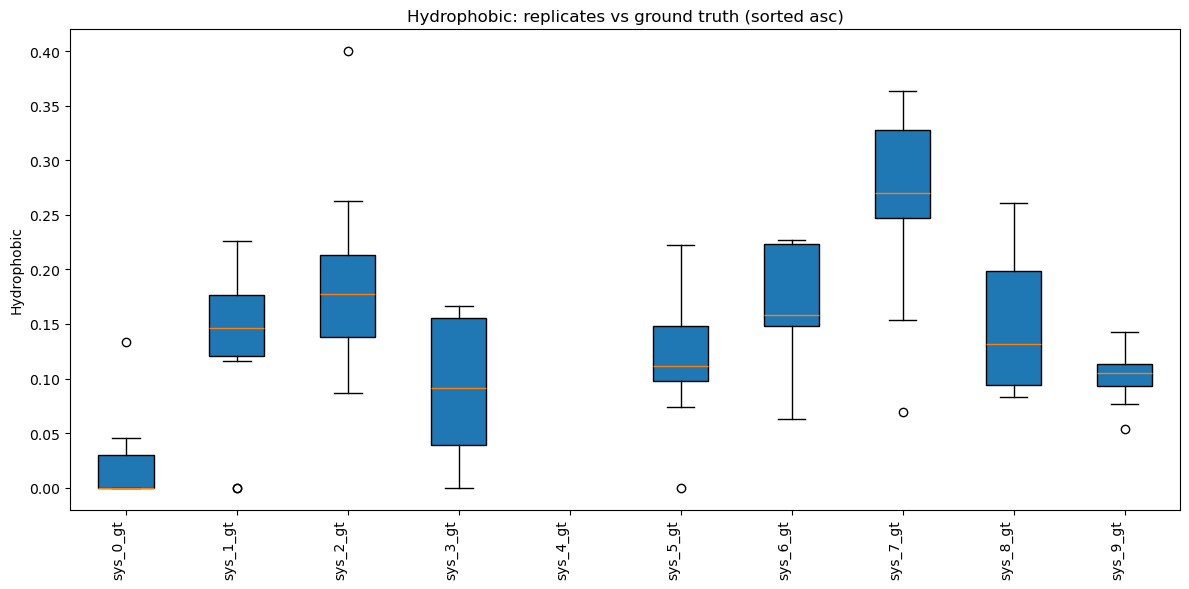

In [60]:
fig, ax = plot_by_sys(data, "Hydrophobic", order="asc")

#ax.set_ylim(-15, 80)
fig.show()

In [61]:
all_results[all_results['model'] == 'true']['HBDonor']

400   NaN
401   NaN
402   NaN
403   NaN
404   NaN
405   NaN
406   NaN
407   NaN
408   NaN
409   NaN
Name: HBDonor, dtype: float64